# ISS Projekt 2023/24

Honza Pavlus, Honza Brukner a Honza Černocký, ÚPGM FIT VUT

6.11.2023

Vypracoval: Michal Pavlíček
xLogin: xpavlim00

## 3. Vstup

In [236]:
import soundfile as sf
import os

# URLs of the audio files
urls = [
    "https://www.fit.vutbr.cz/study/courses/ISS/public/proj2023-24/xpavlim00.wav",
    "https://www.fit.vutbr.cz/study/courses/ISS/public/proj2023-24/FIB.wav",
    "https://www.fit.vutbr.cz/study/courses/ISS/public/proj2023-24/KES.wav"
]

# Download files using wget with --no-check-certificate
for url in urls:
    os.system(f"wget --no-check-certificate {url}")

# Read the downloaded audio file
x, fs = sf.read("xpavlim00.wav")

## 4. Úkoly



### 4.1. [2.5b] Nahrání a zobrazení EKG signálu

Nezapomeňte na popisy os u jednotlivých grafů.

 a) [1b] Nahrajte EKG signál login.wav, vyberte 5-sekundový úsek a zobrazte ho v časové doméně. Pro nahrání signálu použijte knihovny numpy a soundfile.




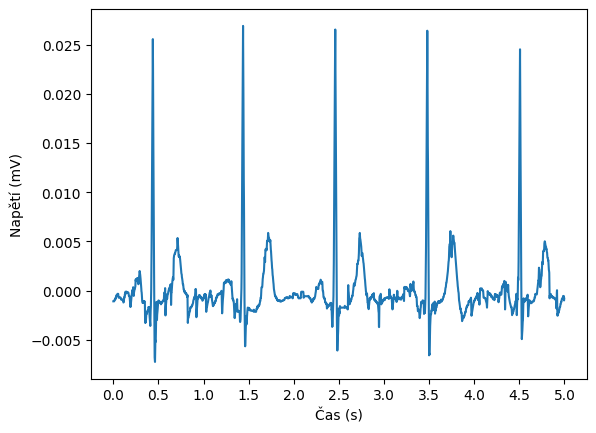

In [237]:
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt

data, samplerate = sf.read("xpavlim00.wav")

original_duration = len(data) / samplerate
SAMPLE_LENGTH = 2500 # 5 seconds
SAMPLE_START = 0
TIME_STEP = 1 / samplerate # Interval between samples
SAMPLE_DURATION = SAMPLE_LENGTH / samplerate

sample = data[SAMPLE_START:SAMPLE_LENGTH+SAMPLE_START] # 5 seconds long sample
time_values = np.arange(0, SAMPLE_DURATION, TIME_STEP)

plt.ylabel('Napětí (mV)')
plt.xlabel('Čas (s)')
plt.xticks(np.arange(0, 6, 0.5))
plt.plot(time_values, sample)

b) [1b] Spočítejte spektrum z 5 sekundového úseku nahraného signálu a zobrazte jej.


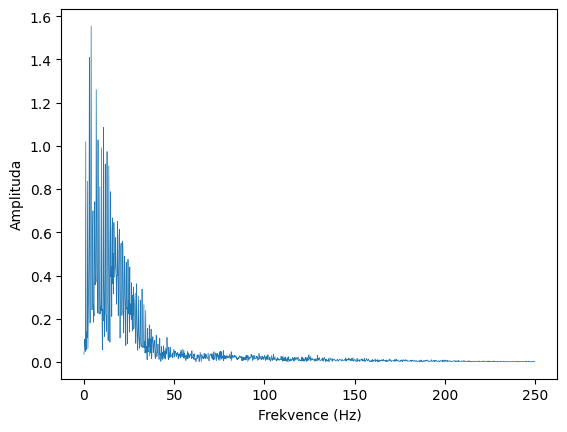

In [238]:
spectrum = np.fft.fft(sample)
frequencies = np.fft.fftfreq(len(sample))
mask = frequencies >= 0
frequencies = frequencies[mask] * samplerate

plt.plot(frequencies, np.abs(spectrum[mask]))
plt.xlabel('Frekvence (Hz)')
plt.ylabel('Amplituda')
plt.setp(plt.gca().get_lines(), linewidth=0.5)
plt.show()

 c) [0.5b] Ve spektru vidíte rušení na 50Hz nebo 60Hz a jejich harmonických frekvencích. Vysvětlete, čím je způsobeno.

Na frekvencích 50 Hz a 60 Hz v mém vzorku není patrné žádné závažnější rušení. Co by však obecně mohlo mít vliv je elektřina, která v zásuvkách běží na 50 Hz. Toto rušení se mohlo k signálu dostat například přes elektrody připojené na pacienta během měření EKG. 

### 4.2. [3b] Převzorkujte nahraný signál



a) [2b] Převzorkujte signál na vzorkovací frekvenci 100 Hz, nezapomeňte na filtr pro antialiasing. Můžete například odstranit část spektra od $\frac{Fs}{2}$ nebo použít filtr dolní propusti.

In [239]:
from scipy.signal import decimate

resampled = decimate(sample, 5)
resampled_sample_rate = samplerate / 5

time_values_resampled = np.linspace(0, 5, len(resampled))

b) [1b] Zobrazte 5 sekundový úsek původního a převzorkovaného signálu v časové doméně a zobrazte i jejich spektra.

Text(0, 0.5, 'Amplituda')

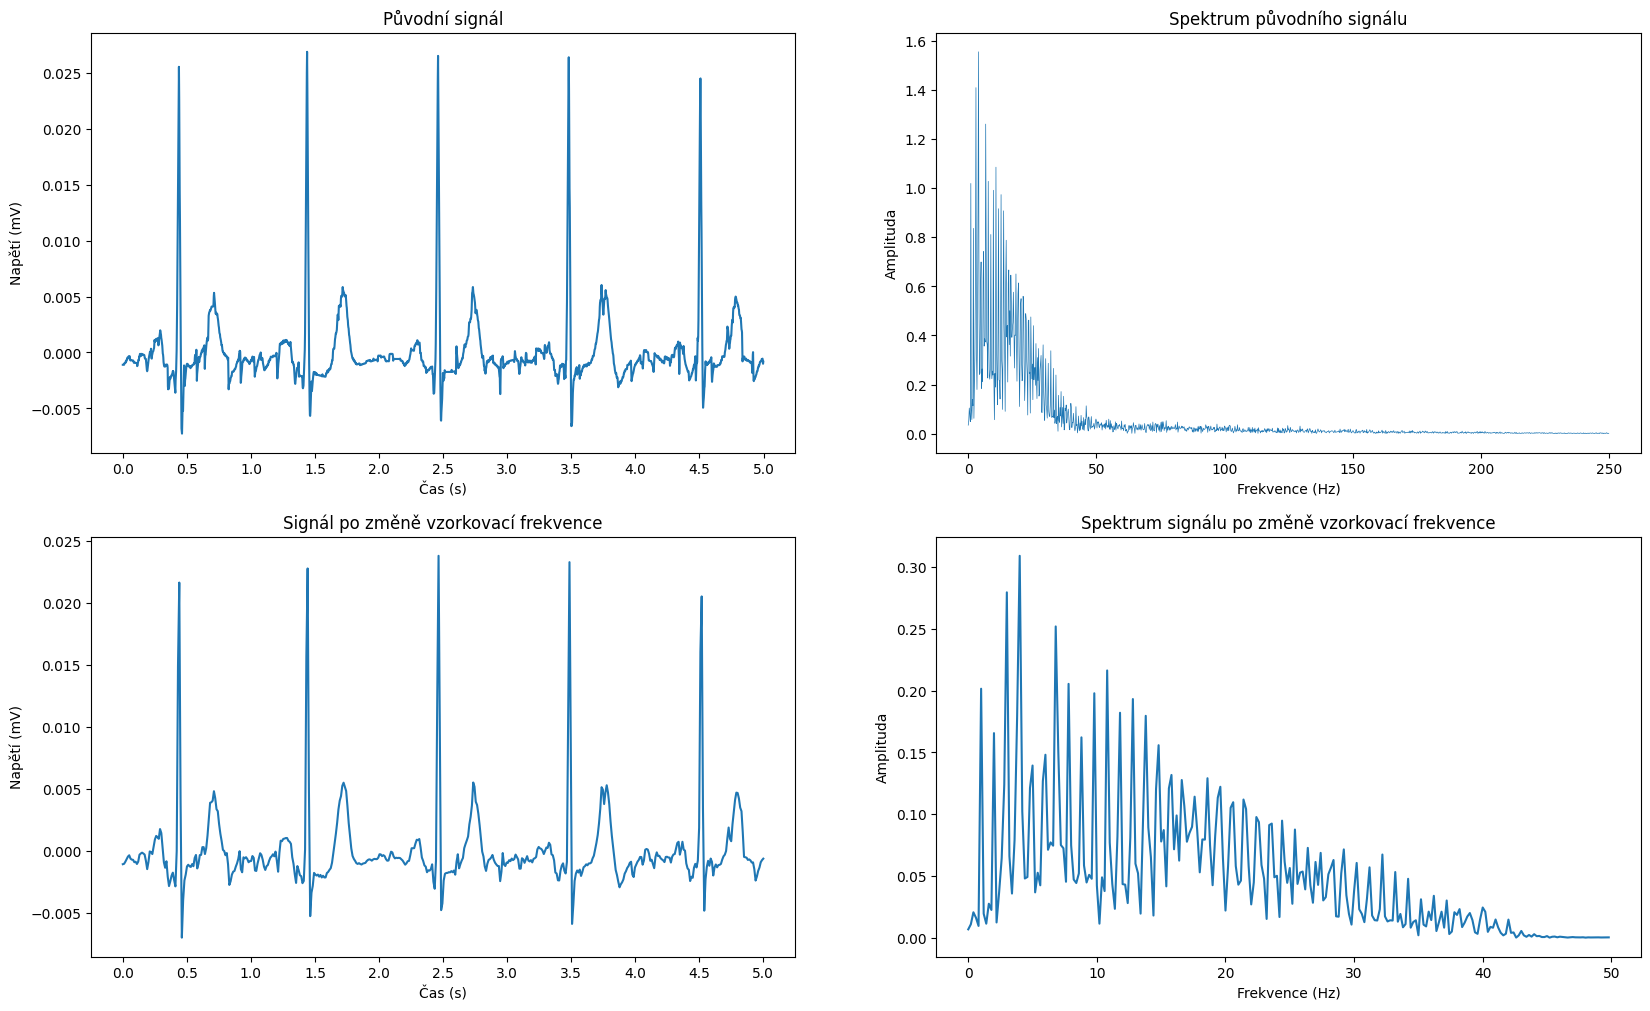

In [240]:
fig, axs = plt.subplots(2, 2, figsize=(20, 12))
plt.setp(axs[0, 1].get_lines(), linewidth=0.5)

axs[0, 0].plot(time_values, sample)
axs[0, 0].set_title('Původní signál')
axs[0, 0].set_xlabel('Čas (s)')
axs[0, 0].set_ylabel('Napětí (mV)')
axs[0, 0].set_xticks(np.arange(0, 5.5, 0.5))

axs[0, 1].plot(frequencies, np.abs(spectrum[mask]))
axs[0, 1].set_title('Spektrum původního signálu')
axs[0, 1].set_xlabel('Frekvence (Hz)')
axs[0, 1].set_ylabel('Amplituda')
plt.setp(axs[0, 1].get_lines(), linewidth=0.5)

axs[1, 0].plot(time_values_resampled, resampled)
axs[1, 0].set_title('Signál po změně vzorkovací frekvence')
axs[1, 0].set_xlabel('Čas (s)')
axs[1, 0].set_ylabel('Napětí (mV)')
axs[1, 0].set_xticks(np.arange(0, 5.5, 0.5))

spectrum_resampled = np.fft.fft(resampled)
frequencies_resampled = np.fft.fftfreq(len(resampled))
mask_resampled = frequencies_resampled >= 0
frequencies_resampled = frequencies_resampled[mask_resampled] * resampled_sample_rate

axs[1, 1].plot(frequencies_resampled, np.abs(spectrum_resampled[mask_resampled]))
axs[1, 1].set_title('Spektrum signálu po změně vzorkovací frekvence')
axs[1, 1].set_xlabel('Frekvence (Hz)')
axs[1, 1].set_ylabel('Amplituda')

### 4.3. [4b] Vyfiltrujte nahraný signál pásmovou propustí 10Hz-20Hz

  




a) [2b] Vytvořte filtr pásmové propusti, možnosti jsou dvě: buďto filtrovat pomocí klasického návrhu filtrů, kde získáte koeficienty `a` a `b` (pomocí např. scipy.butter) a zobrazíte charakteristiku filtru + nuly a póly. Nebo se můžete vydat cestou filtrování ve frekvenční doméně, frekvenční charakteristiku vykreslete pomocí spektrální masky.

In [241]:
# We nullify all frequencies below lowcut Hz and above higcut Hz
# And then we apply the inverse Fourier transform to get the filtered signal
def bandpass_filter(spectrum, frequencies, lowcut, highcut):
    spectral_mask = (frequencies >= lowcut) & (frequencies <= highcut)
    spectral_mask = np.tile(spectral_mask, 2)
    spectrum_filtered = spectrum.copy()
    spectrum_filtered[~spectral_mask] = 0

    return np.fft.ifft(spectrum_filtered)

  b) [1b] Použijte navržený filtr na nahraný signál. Pokud máte navržený klasický filtr, proveďte filtrování z obou stran, abyste se vyhnuli fázovému posunu, to za vás zajistí například funkce scipy.signal.filtfilt. Vykreslete původní a vyfiltrovaný signál v časové doméně a spočítejte a zobrazte jejich spektra.


(0.0, 40.0)

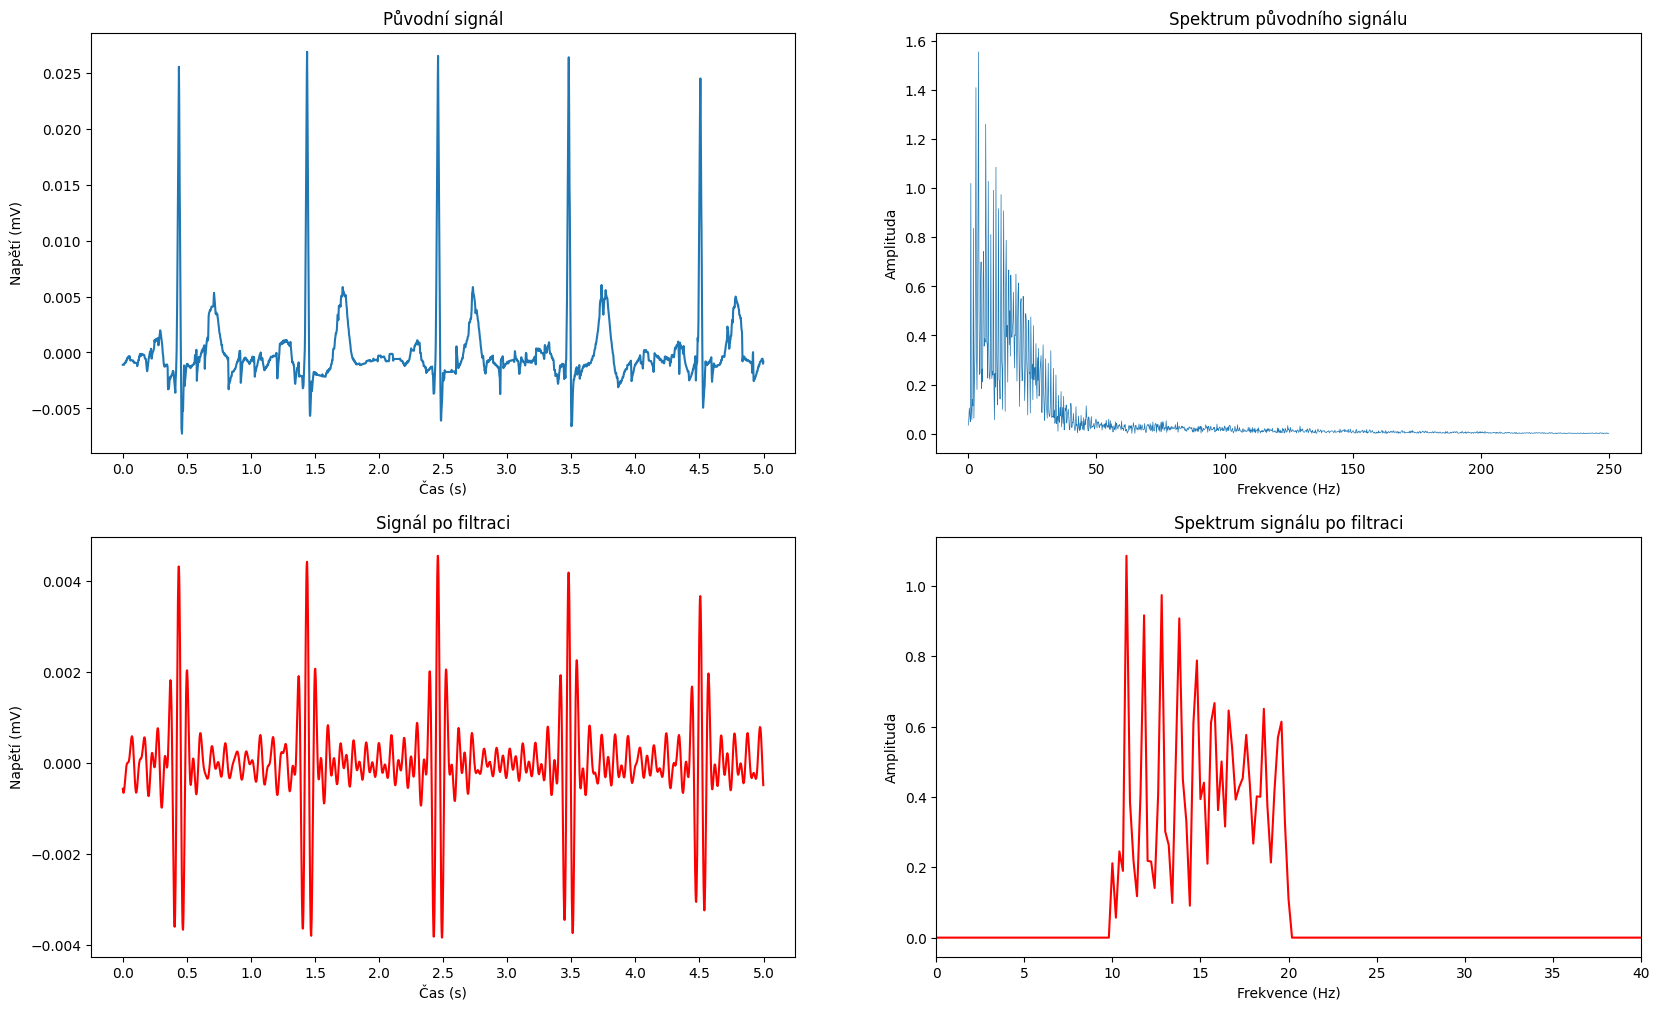

In [242]:
fig, axs = plt.subplots(2, 2, figsize=(20, 12))

axs[0, 0].plot(time_values, sample)
axs[0, 0].set_title('Původní signál')
axs[0, 0].set_xlabel('Čas (s)')
axs[0, 0].set_ylabel('Napětí (mV)')
axs[0, 0].set_xticks(np.arange(0, 5.5, 0.5))

axs[0, 1].plot(frequencies, np.abs(spectrum[mask]))
axs[0, 1].set_title('Spektrum původního signálu')
axs[0, 1].set_xlabel('Frekvence (Hz)')
axs[0, 1].set_ylabel('Amplituda')
plt.setp(axs[0, 1].get_lines(), linewidth=0.5)

axs[1, 0].plot(time_values, bandpass_filter(spectrum, frequencies, 10, 20), color='red')
axs[1, 0].set_title('Signál po filtraci')
axs[1, 0].set_xlabel('Čas (s)')
axs[1, 0].set_ylabel('Napětí (mV)')
axs[1, 0].set_xticks(np.arange(0, 5.5, 0.5))

spectrum_filtered = np.fft.fft(bandpass_filter(spectrum, frequencies, 10, 20))
frequencies_filtered = np.fft.fftfreq(len(bandpass_filter(spectrum, frequencies, 10, 20)))
mask_filtered = frequencies_filtered >= 0
frequencies_filtered = frequencies_filtered[mask_filtered] * samplerate

axs[1, 1].plot(frequencies_filtered, np.abs(spectrum_filtered[mask_filtered]), color='red')
axs[1, 1].set_title('Spektrum signálu po filtraci')
axs[1, 1].set_xlabel('Frekvence (Hz)')
axs[1, 1].set_ylabel('Amplituda')
axs[1, 1].set_xlim(0, 40)


  c) [1b] Okomentujte rozdíl mezi filtrovaným a nefiltrovaným signálem a jejich spektry. Pokud bychom použili filtrování pouze z jedné strany (obyčejnou konvoluci), jaké je teoreticky největší posunutí ve vzorcích, které se může objevit a proč?

V původním signálu je mnohem více frekvencí než ve filtrovaném, který obsahuje pouze frekvence v rozsahu 10-20 Hz. Výsledkem je signál, který je mnohem čistší a lépe se na něm dají pozorovat jednotlivé frekvence.